## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

The key idea behind DBSCAN is to group points that are within a certain distance of each other into a cluster. Points that do not meet this density criterion are treated as noise or outliers.



DBSCAN relies on three main concepts:

1. ε (epsilon radius):

* A predefined radius within which DBSCAN looks for neighboring points.
* This parameter controls the "neighborhood size."

2. MinPts (minimum points):

* The minimum number of data points required to form a dense region.
* A region is considered dense if it contains at least MinPts within the radius ε.

3. Density Types of Points:

* Core Points: Points that have at least MinPts neighbors (including itself) within the radius ε.
* Border Points: Points that are within the ε radius of a core point but do not themselves have enough points within ε to qualify as a core point.
Noise Points (Outliers): Points that are neither core points nor border points.

**Advantages of DBSCAN**
1. Automatic Outlier Detection:
* DBSCAN automatically labels points that don't belong to any cluster as noise, making it highly robust to outliers.

2. Clusters of Arbitrary Shapes:
* Unlike K-Means, which forms spherical clusters, DBSCAN can identify clusters of arbitrary shapes (e.g., elongated, curved).
No Need to Predefine Number of Clusters:
* DBSCAN eliminates the need to specify the number of clusters beforehand, unlike K-Means.

3. Density-Based Clustering:
* DBSCAN adapts well to datasets with varying densities by focusing on dense regions.

**Challenges of DBSCAN**

1. Choice of Parameters (ε and MinPts):
* The performance of DBSCAN is highly sensitive to the choice of ε and MinPts.
* A poor choice can lead to either too many small clusters or one large cluster.

2. Difficulty in Handling Varying Densities:
* If clusters in the dataset have significantly different densities, DBSCAN may fail to identify them correctly.

3. High Dimensionality:
* In high-dimensional data, the notion of distance becomes less meaningful due to the curse of dimensionality. DBSCAN's performance can degrade in such cases.


**Parameter Selection**
* ε (Epsilon Radius): Use methods like the k-distance plot, where you sort the distances of each point to its k-th nearest neighbor and look for the "elbow point." This elbow is a good candidate for ε.
* MinPts: A good heuristic is to set MinPts to 2 × dimensions of the dataset.


**Applications of DBSCAN**
* Geospatial Data: Identifying regions of high activity or interest.
* Image Segmentation: Grouping pixels into regions of interest.
* Anomaly Detection: Detecting outliers in financial data or network traffic.
* Astronomy: Grouping stars, galaxies, or other celestial objects.


### Implementation

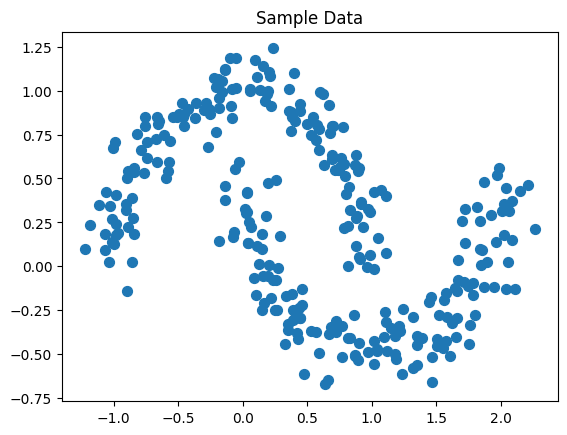

In [27]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Data")
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


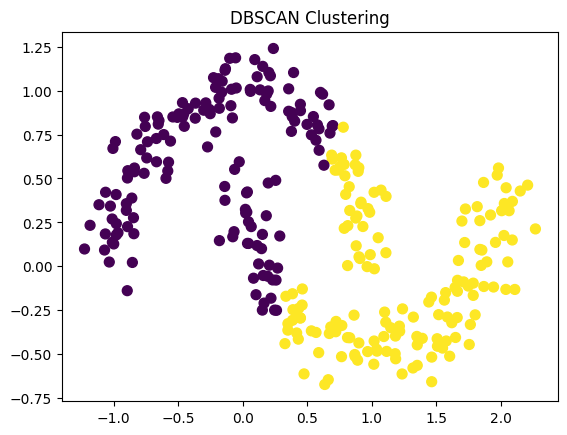

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize DBSCAN
dbscan = KMeans(n_clusters=2)

# Fit and predict cluster labels
labels = dbscan.fit_predict(X)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.show()


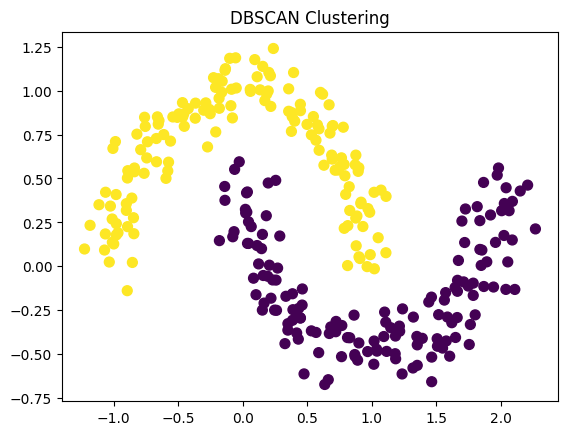

In [29]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)

# Fit and predict cluster labels
labels = dbscan.fit_predict(X)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.show()

In [30]:
labels[labels == -1]

array([], dtype=int64)

In [31]:
import numpy as np
np.unique(labels)

array([0, 1], dtype=int64)

In [35]:
# Exclude noise points (-1) from Silhouette Score calculation
filtered_labels = labels[labels != -1]
filtered_data = X[labels != -1]

score = silhouette_score(filtered_data, filtered_labels)
# A Silhouette Score closer to 1 indicates well-separated clusters.
print(f"Silhouette Score (excluding noise): {score:.2f}")

Silhouette Score (excluding noise): 0.32


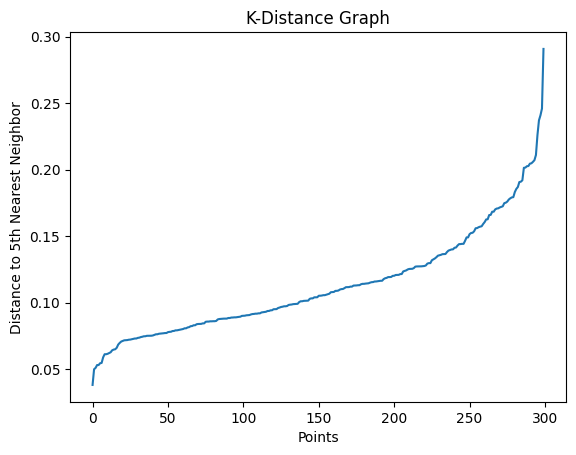

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5).fit(X)
distances, _ = neighbors.kneighbors(X)

# Sort distances for k-distance plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.show()